In [167]:
%matplotlib inline

In [224]:
!ls -l data

total 2156684
-rw-r--r-- 1 jarmo jarmo  38469288 touko 17 15:51 0.195312
-rw-r--r-- 1 jarmo jarmo         0 touko  9 16:25 2017-01-25 12:13:32.073985-sense.tsv
-rw-r--r-- 1 jarmo jarmo  23295641 touko  9 16:25 2017-01-25 12:16:51.836862-sense.tsv
-rw-r--r-- 1 jarmo jarmo   1930955 touko  9 16:25 2017-01-25 14:58:00.731870-sense.tsv
-rw-r--r-- 1 jarmo jarmo         0 touko  9 16:25 2017-01-25 15:04:51.381577-sense.tsv
-rw-r--r-- 1 jarmo jarmo    889326 touko  9 16:25 2017-01-25 15:06:07.339379-sense.tsv
-rw-r--r-- 1 jarmo jarmo   1490108 touko  9 16:25 2017-01-26 09:31:26.563473-sense.tsv
-rw-r--r-- 1 jarmo jarmo   3353931 touko  9 16:25 2017-01-26 09:45:27.976551-sense.tsv
-rw-r--r-- 1 jarmo jarmo   4464249 touko  9 16:25 2017-01-26 09:52:47.254269-sense.tsv
-rw-r--r-- 1 jarmo jarmo   3890729 touko  9 16:25 2017-01-26 09:53:58.977495-sense.tsv
-rw-r--r-- 1 jarmo jarmo   1794625 touko  9 16:25 2017-01-26 11:04:40.764666-sense.tsv
-rw-r--r-- 1 jarmo jarmo   4788728 touko  9 16:25 2017-01

In [31]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


import matplotlib
matplotlib.rcParams.update({'font.size': 12})

def load_data(filename):
    df = pd.read_csv(filename, header=None, delimiter="|", names=["time", "center_f", "bin_f", "power", "noise", 'scan', 'sweep'])
    return df
def plot_specturm(df, title="Frequency Spectrum"):
    plt.figure(figsize=(100,4))
    plt.title(title)
    plt.xlabel('Frequency [Hz]');plt.ylabel('Power [dB]')
    plt.plot(df.bin_f, df.power + df.noise)

def read_sense_v0_1(filename):
    df = pd.read_csv(filename,
        header=None,
        comment="#",
        delimiter="|",
        names=["time", "center_f", "bin_f", "power_plain", "power", "noise", 'scan', 'sweep'])
    return df
def read_sense_v0_0(filename):
    df = pd.read_csv(filename,
                     header=None,
                     comment="#",
                     delimiter="|", names=["time", "center_f", "bin_f", "power", "noise", 'scan', 'sweep'])
    return df

def show_frequencies(df):
    plt.figure(figsize=(10,2))
    plt.scatter(df.bin_f, df.center_f, marker=".")
    plt.ylabel('center frequency [Hz]');plt.xlabel('FFT bin frequency [Hz]')


def freq_tick_formatter(x, p):
    return x/1e6

def show_heatmap(df, bins=100):
    
    #df = df[df.scan == 0]
    fig = plt.figure(figsize = (10,4.5))
    plt.hist2d(df.bin_f, df.power, bins=bins)
    #plt.hexbin(df.bin_f, df.power)
    plt.ylabel("Power [dB]")
    plt.xlabel("Frequency [MHz]")

    ax = fig.add_subplot(111)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: x/1e6))

    #plt.clim(0,100)
    #cbar = plt.colorbar()
    #cbar.ax.set_yticklabels(['< -1', '> 1']) 
    plt.grid(alpha=0.2)

In [57]:
sensed = pd.read_csv('data/2017-01-25 15:06:07.339379-sense.tsv', header=None, delimiter="|", names=["time", "center_f", "bin_f", "power", "noise", 'scan', 'sweep'])
sensed.head(5)

,time,center_f,bin_f,power,noise,scan,sweep
0,2017-01-25 15:06:07.841120,790375000,790000000,3.720055,-121.233805,0,0
1,2017-01-25 15:06:07.841228,790375000,790006250,3.547595,-121.233805,0,0
2,2017-01-25 15:06:07.841269,790375000,790012500,4.670485,-121.233805,0,0
3,2017-01-25 15:06:07.841304,790375000,790018750,4.109827,-121.233805,0,0
4,2017-01-25 15:06:07.841358,790375000,790025000,2.725928,-121.233805,0,0


The spectum is sensed by collection multiple slightly overlapping FFTs by tuning the center frequency.

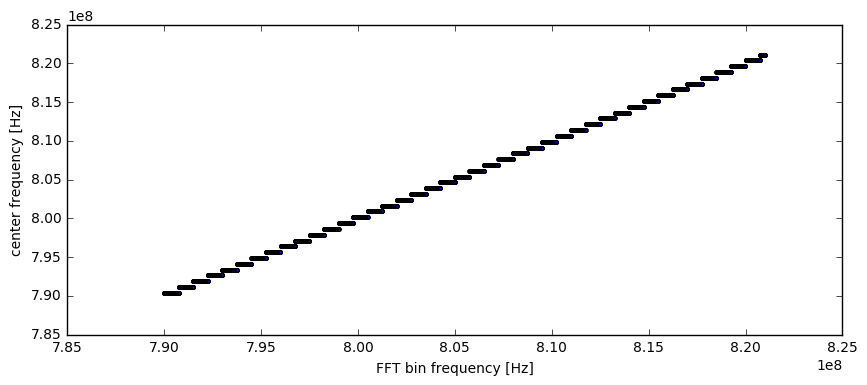

In [58]:
plt.figure(figsize=(10,4))
plt.scatter(sensed.bin_f, sensed.center_f, marker=".")
plt.ylabel('center frequency [Hz]');plt.xlabel('FFT bin frequency [Hz]')
plt.show()

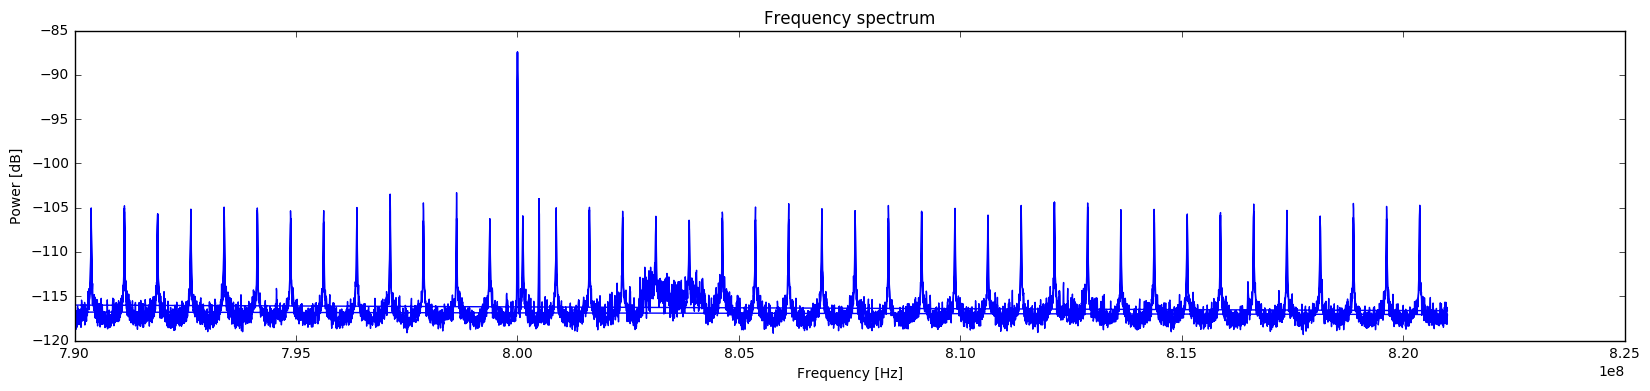

In [59]:

plot_specturm(sensed)
plt.show()

In [60]:
sweep = sensed[(sensed.sweep == 1)]
sweep

,time,center_f,bin_f,power,noise,scan,sweep
4961,2017-01-25 15:06:28.847896,790375000,790000000,4.459331,-121.251425,0,1
4962,2017-01-25 15:06:28.847975,790375000,790006250,4.715857,-121.251425,0,1
4963,2017-01-25 15:06:28.848019,790375000,790012500,3.746954,-121.251425,0,1
4964,2017-01-25 15:06:28.848060,790375000,790018750,4.032861,-121.251425,0,1
4965,2017-01-25 15:06:28.848105,790375000,790025000,3.325541,-121.251425,0,1
4966,2017-01-25 15:06:28.848236,790375000,790031250,4.105340,-121.251425,0,1
4967,2017-01-25 15:06:28.848303,790375000,790037500,3.323410,-121.251425,0,1
4968,2017-01-25 15:06:28.848365,790375000,790043750,4.603734,-121.251425,0,1
4969,2017-01-25 15:06:28.848429,790375000,790050000,3.178669,-121.251425,0,1
4970,2017-01-25 15:06:28.848493,790375000,790056250,4.149839,-121.251425,0,1




default parameter values:

- sample rate: 1 MSps
- FFT bin width: 6250 Hz
- FFT bin count: sample rate/ bin width
- hw gain: 19dB



```
            noise_floor_db = 10*math.log10(min(m.data)/tb.usrp_rate)
            power_db = 10*math.log10(m.data[i_bin]/tb.usrp_rate) - noise_floor_db
```

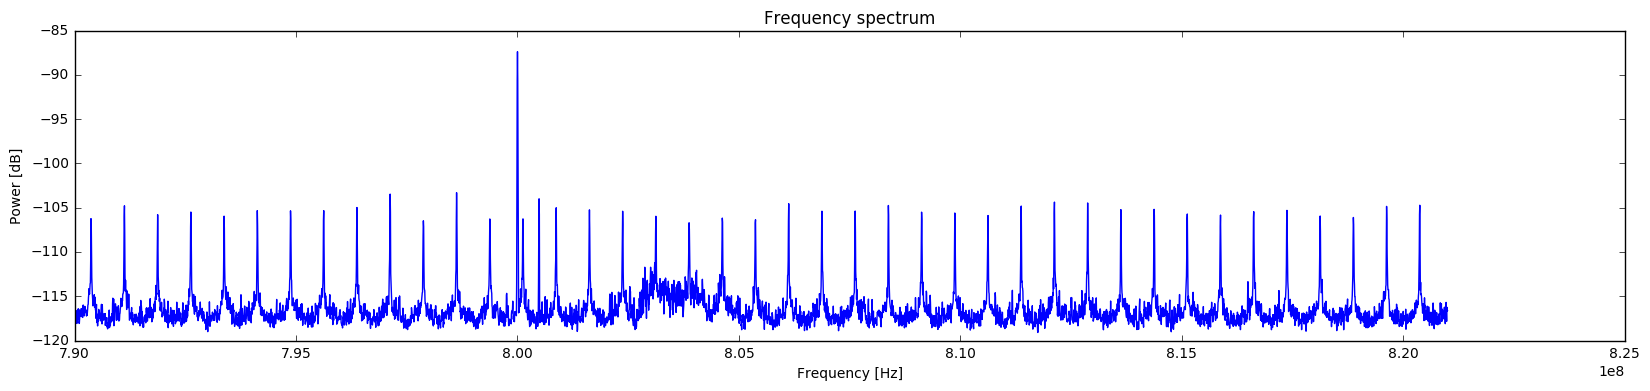

In [61]:
plot_specturm(sweep)
plt.show()

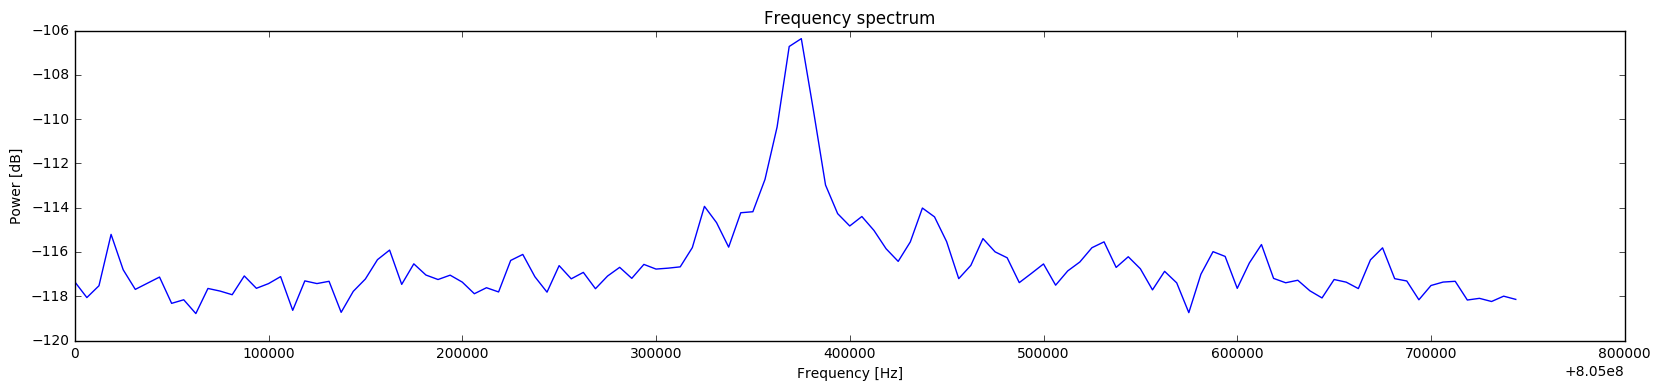

In [62]:
plot_specturm(sweep[sweep.scan == 20])
plt.show()

## Increasing the Smaple Rate

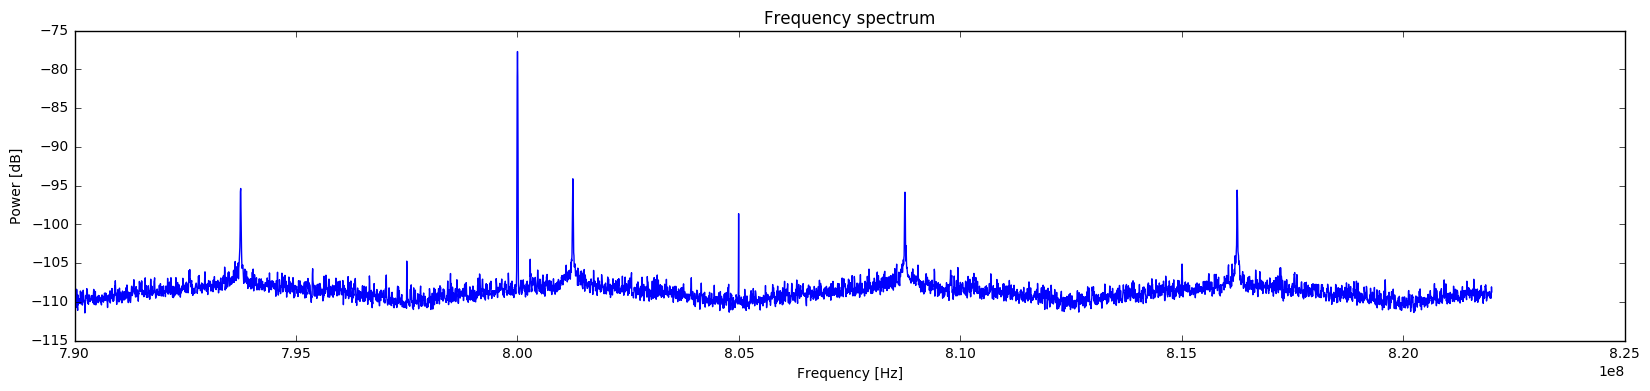

In [63]:
# 10 MSps sample rate during sensing
s10 = load_data('data/2017-01-26 09:31:26.563473-sense.tsv')
plot_specturm(s10[s10.sweep == 0])
plt.show()

## CIC rolloff

The  `dsp_rate/samp_rate` ratio needs to be even in order to avoid CIC (cascaded integration-comb) rollof in the FIR.

The spectrum below was sensed using a `samp_rate = 20_000_000` (ratio `100e6 / 20e6 == 5`)


> The requested decimation is odd; the user should expect CIC rolloff.
    Select an even decimation to ensure that a halfband filter is enabled.



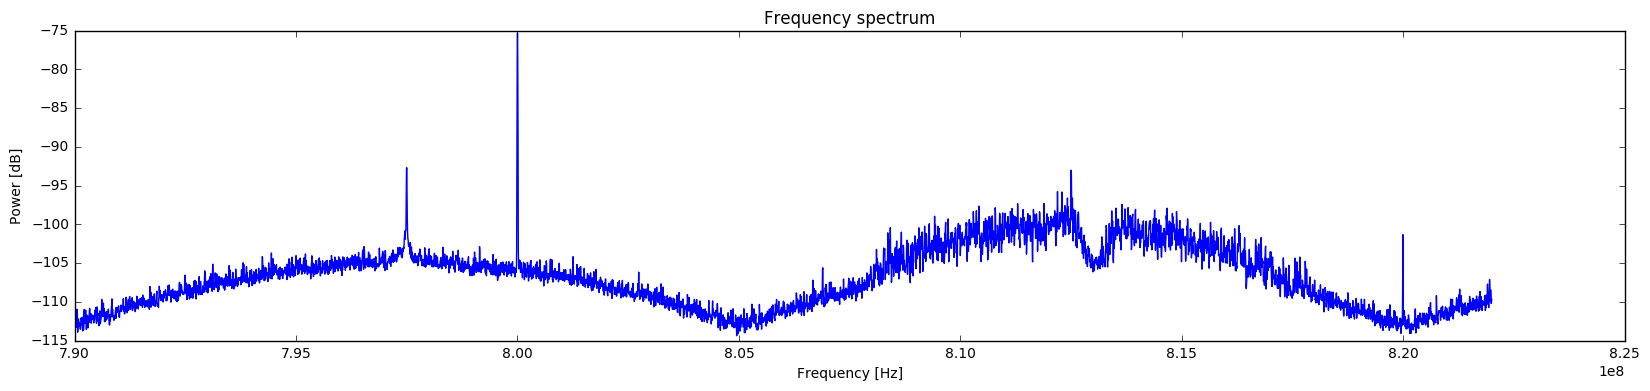

In [64]:
s20 = load_data('data/2017-01-26 09:45:27.976551-sense.tsv')
plot_specturm(s20[s20.sweep == 2])
plt.show()

The CIC rollof artefacts are clearly reduced by changing the sample rate from 20 MSps to 25 MSps (so that `dsp_rate/samp_rate == 4` is even)

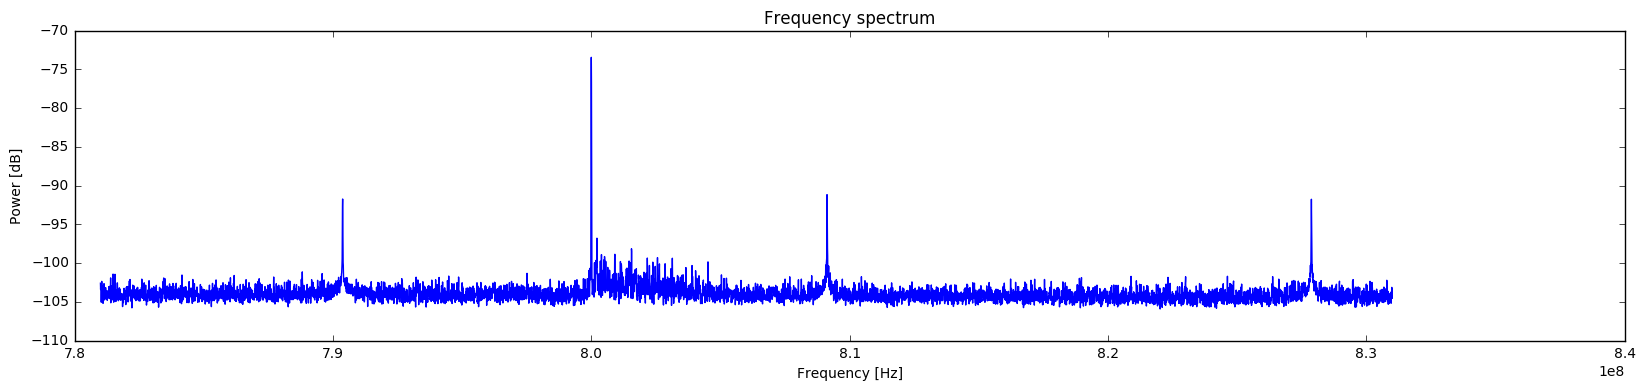

In [65]:
s25 = load_data('data/2017-01-26 09:53:58.977495-sense.tsv')
plot_specturm(s25[s25.sweep == 0])
plt.show()      

# CIC rolloff optimal sampling rates

In [8]:
import numpy as np

100e6/(np.arange(2,20)*2)

array([ 25000000.        ,  16666666.66666667,  12500000.        ,
        10000000.        ,   8333333.33333333,   7142857.14285714,
         6250000.        ,   5555555.55555556,   5000000.        ,
         4545454.54545455,   4166666.66666667,   3846153.84615385,
         3571428.57142857,   3333333.33333333,   3125000.        ,
         2941176.47058824,   2777777.77777778,   2631578.94736842])

In [9]:
100e6/0.195312

512001310.7233554

# CIC rolloff figures

This figure is used in the manuscript

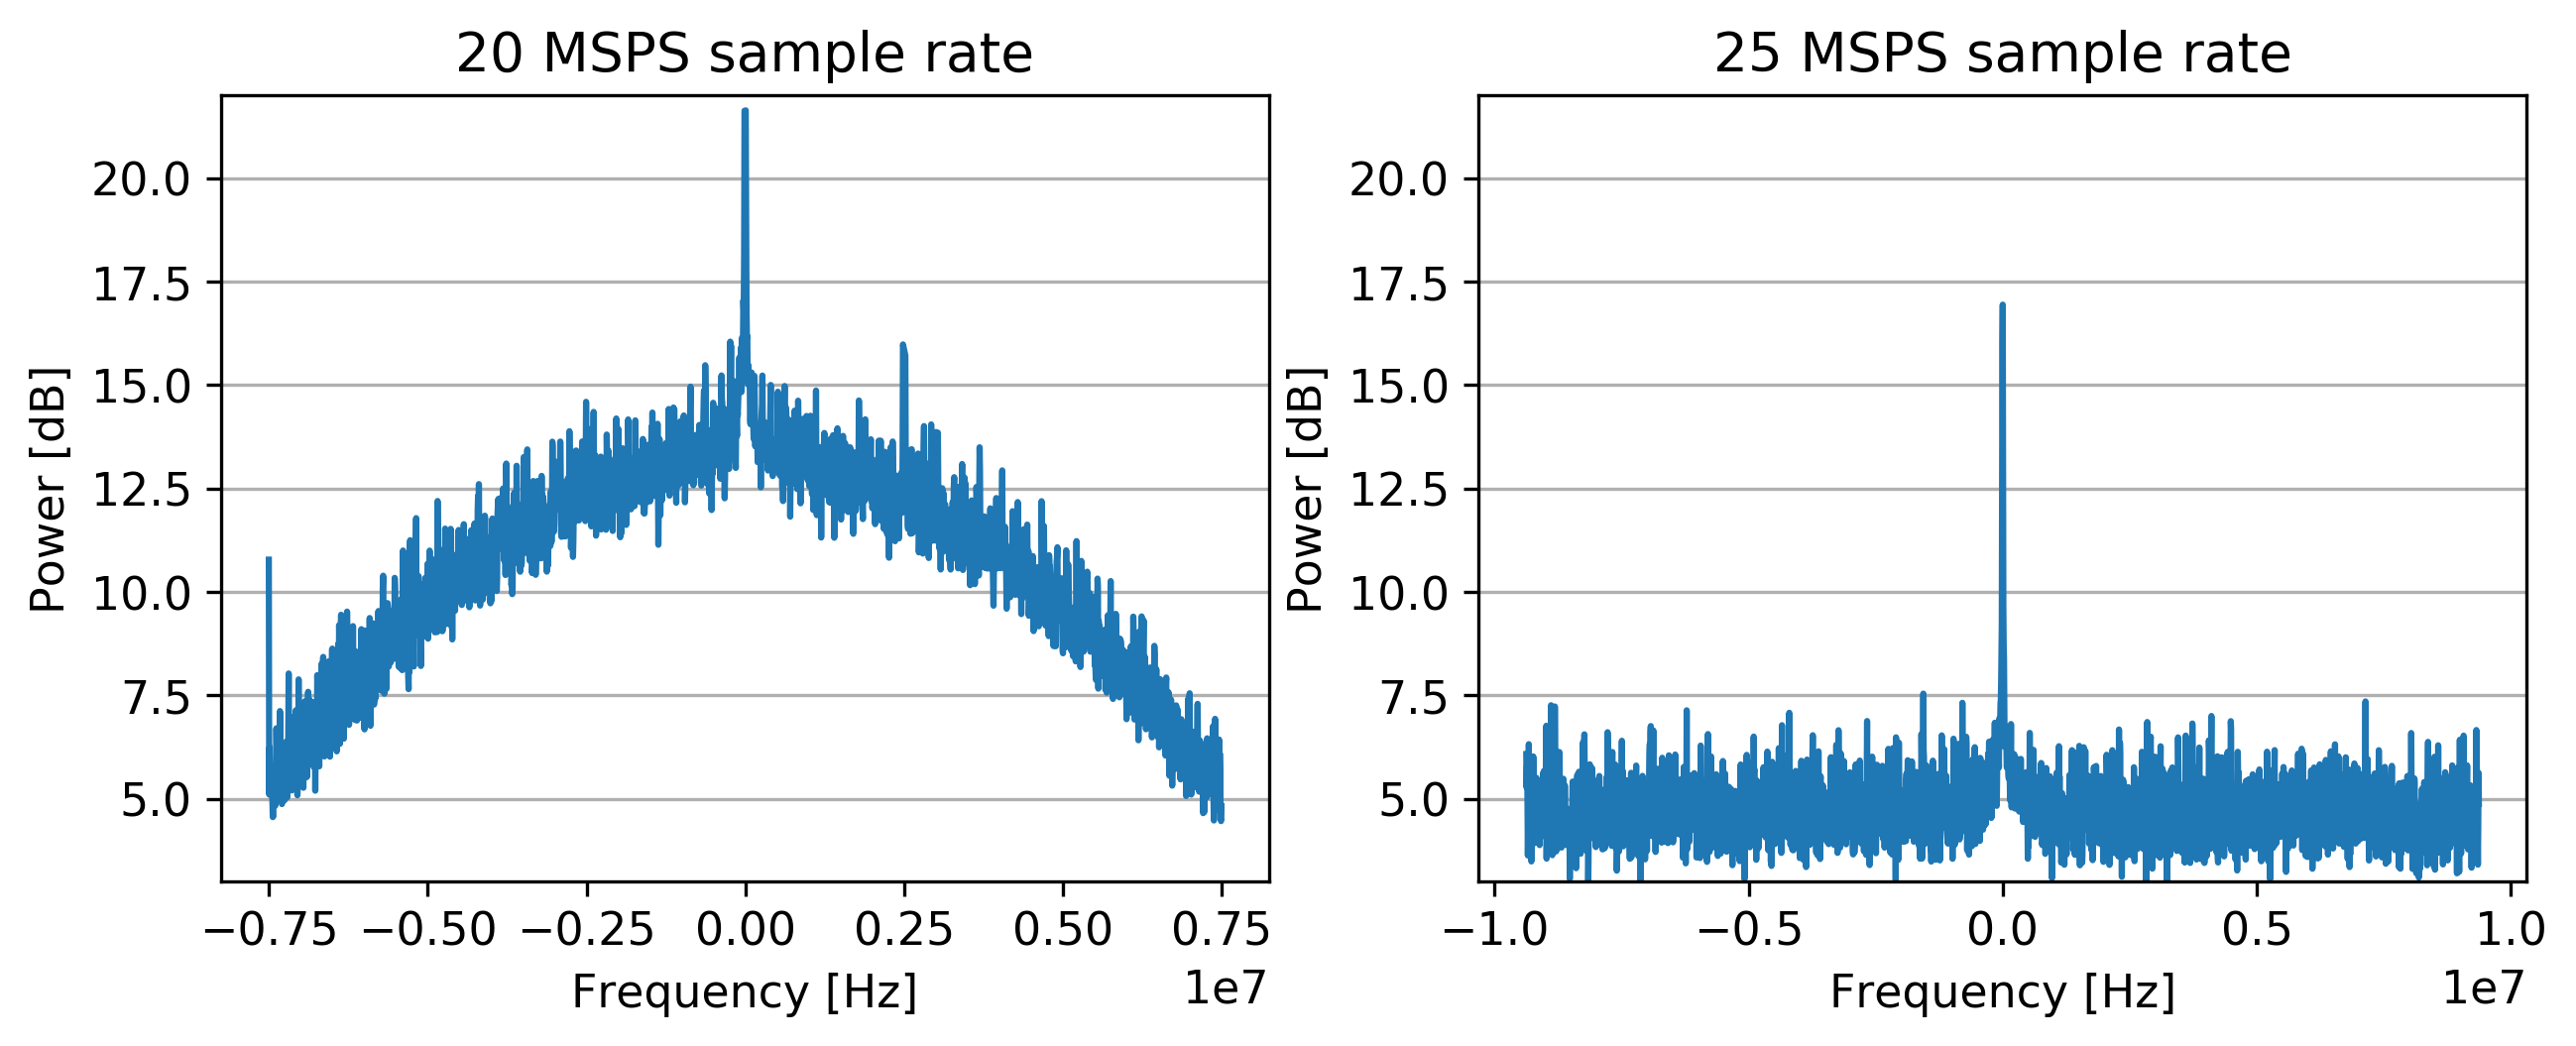

In [135]:

matplotlib.rcParams.update({'font.size': 11})


# s25 = load_data('data/2017-01-26 09:53:58.977495-sense.tsv')
s20 = load_data('data/2017-01-26 09:45:27.976551-sense.tsv')
s25 = load_data('data/2017-01-26 09:53:58.977495-sense.tsv')

a = s20[s20.center_f == s20.center_f.min()]
a = a[a.power < 25] # remove errorneus datapoint to better highligh the artefact


fig = plt.figure(figsize=(10,3.5), dpi=300)
# fig.suptitle("Sample rate effect on CIC rolloff")

ax = fig.add_subplot(121)

ax.set_ylim(3,22)
ax.yaxis.grid()
ax.set_title("20 MSPS sample rate")
ax.set_ylabel("Power [dB]")
ax.set_xlabel("Frequency [Hz]")
ax.plot(a[a.sweep == 0].bin_f - a.center_f.min(),
        a[a.sweep == 0].power)


ax = fig.add_subplot(122)
ax.set_ylim(3,22)
ax.yaxis.grid()
ax.set_title("25 MSPS sample rate")
ax.set_ylabel("Power [dB]")
ax.set_xlabel("Frequency [Hz]")

a = s25[s25.center_f == s25.center_f.min()]
ax.plot(a[a.sweep == 0].bin_f - a.center_f.min(),
         a[a.sweep == 0].power)
plt.savefig('doc/img/cic-rollof-by-sample-rate.png', dpi=300)
plt.show()



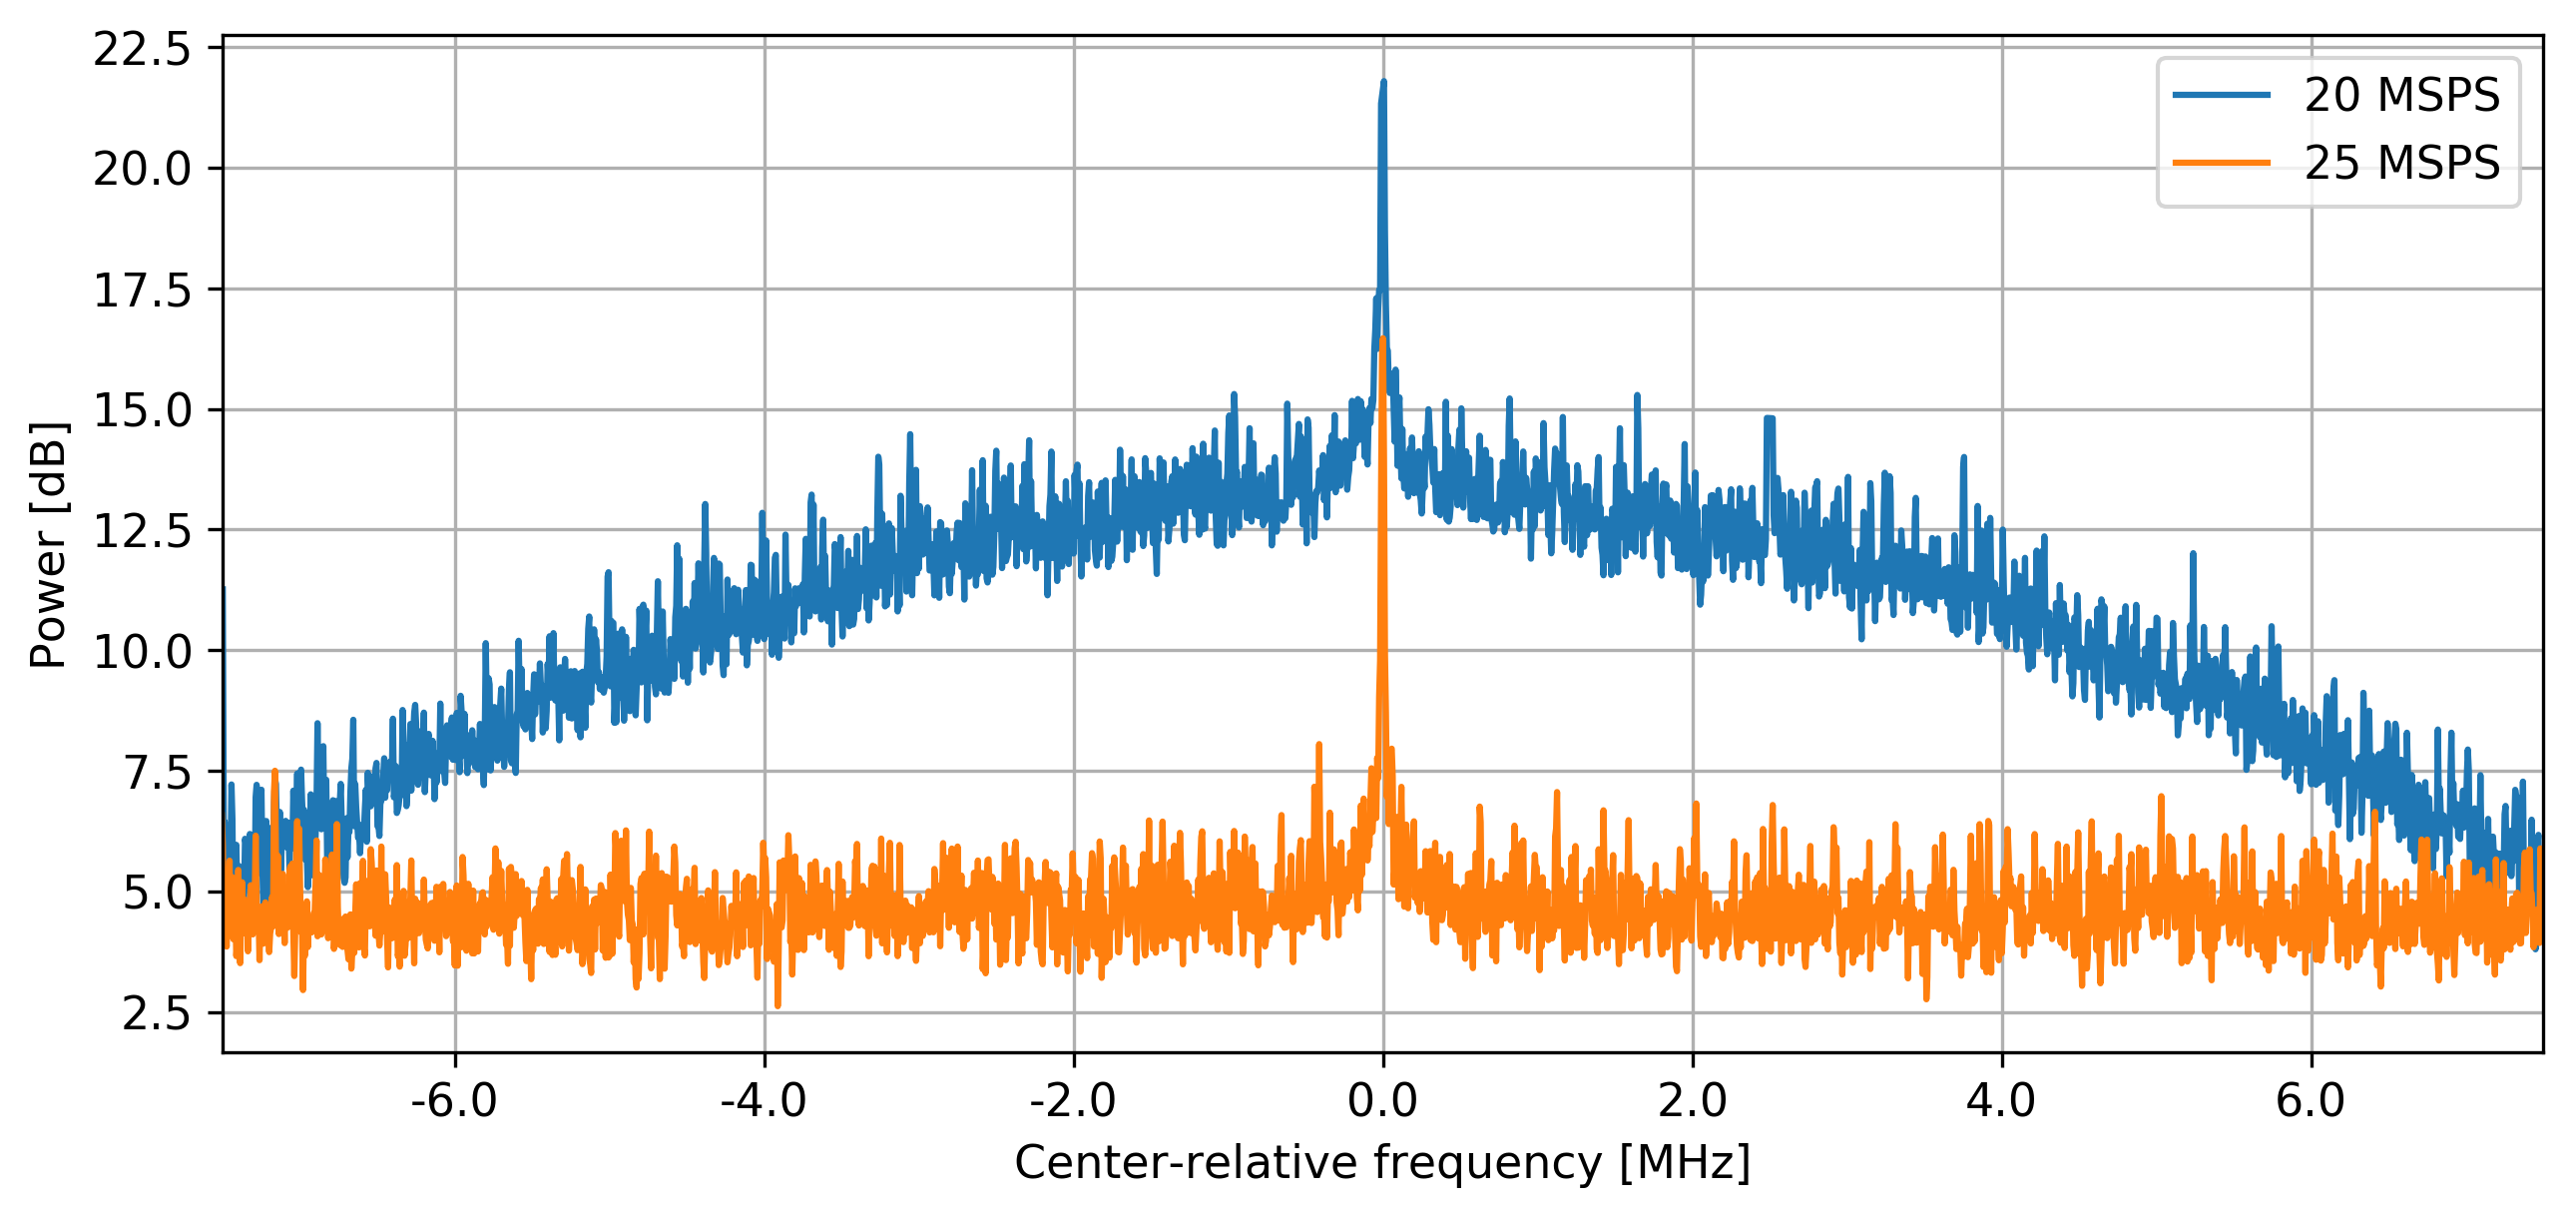

In [30]:
from matplotlib.ticker import FuncFormatter

matplotlib.rcParams.update({'font.size': 11})


# s25 = load_data('data/2017-01-26 09:53:58.977495-sense.tsv')
s20 = load_data('data/2017-01-26 09:45:27.976551-sense.tsv')
s25 = load_data('data/2017-01-26 09:53:58.977495-sense.tsv')

a = s20[s20.center_f == s20.center_f.unique()[0]]
a = a[a.power < 25] # remove errorneus datapoint to better highligh the artefact


fig = plt.figure(figsize=(10,4.5), dpi=300)
# fig.suptitle("Sample rate effect on CIC rolloff")

ax = fig.add_subplot(111)


ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: x/1e6))

ax.grid()
ax.set_ylabel("Power [dB]")
ax.set_xlabel("Center-relative frequency [MHz]")

ax.plot(a[a.sweep == 2].bin_f - a.center_f.min(),
        a[a.sweep == 2].power, label='20 MSPS')


a = s25[s25.center_f == s25.center_f.min()]
ax.plot(a[a.sweep == 2].bin_f - a.center_f.min(),
         a[a.sweep == 2].power, label='25 MSPS')
ax.set_xlim(-0.75e7, 0.75e7)
plt.legend()
plt.savefig('doc/img/cic-rollof-by-sample-rate-superpose.png', dpi=300, bbox_inches = 'tight')
plt.show()


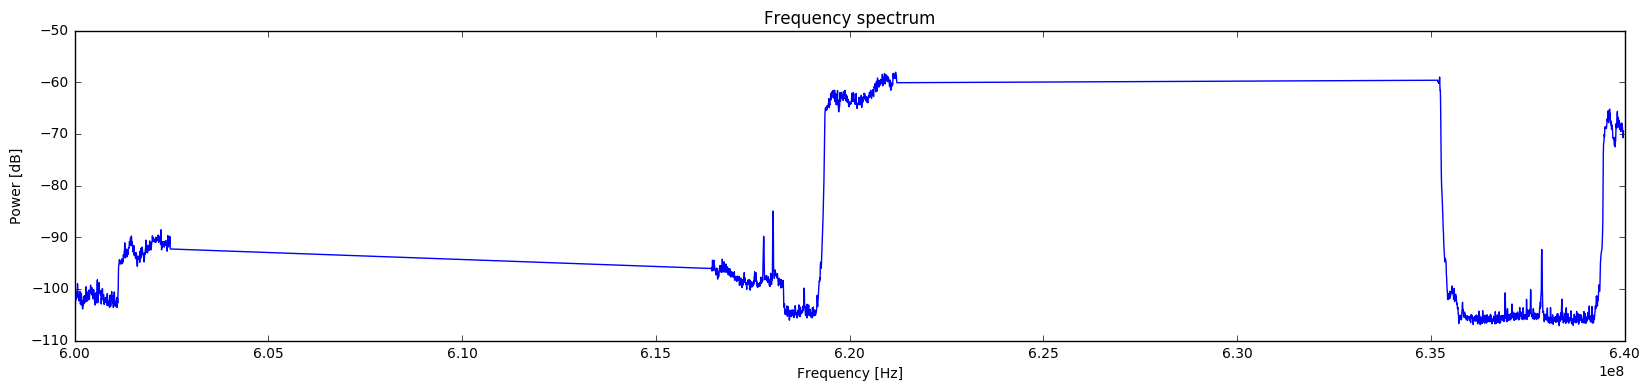

In [69]:
## this data is garbage
t25 = load_data('data/2017-01-26 11:06:21.121181-sense.tsv')
plot_specturm(t25[t25.sweep == 0])
plt.show()

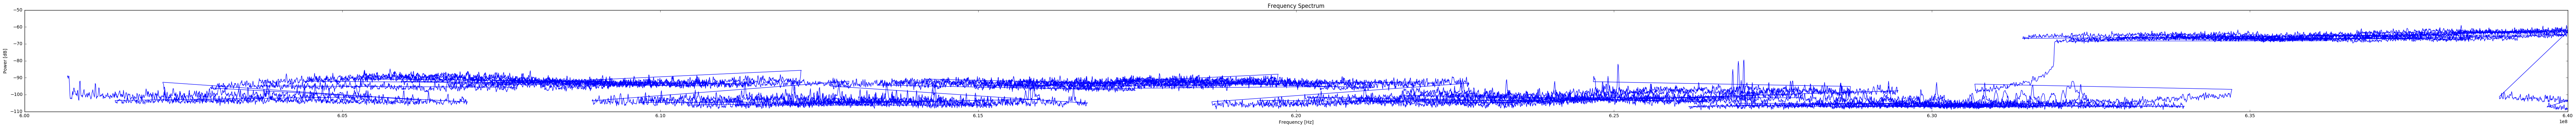

In [75]:
## this data is garbage
t_def = load_data('data/2017-01-26 11:05:28.247141-sense.tsv')
plot_specturm(t_def[t_def.sweep == 0])
plt.show()


# FFT size vs. noise floor

Altering the FFT size ei. the bin count in the FFT, behaves in a similar manner as the RBW parameter in analog specturm analysers, whit some exceptions. The FFT bin size determines the resolution in the frequency domain. SDR applications typically allow configuring widht of the received spectrum -- referred to as sample rate -- and the FFT size.

The FFT size has to be adjusted when altering the width of the received spectrum in order to maintain the resolution in the frequency domain

$$ resolution \text{ [Hz]} = \cfrac{fftwidth \text{ [Hz]}}{bins \text{ [count]}}  $$

The noise floor of the USRP's received spectrum was measured as a function of the FFT size. The measurements were done using a 50 Ohm termination on the antnna connector. 


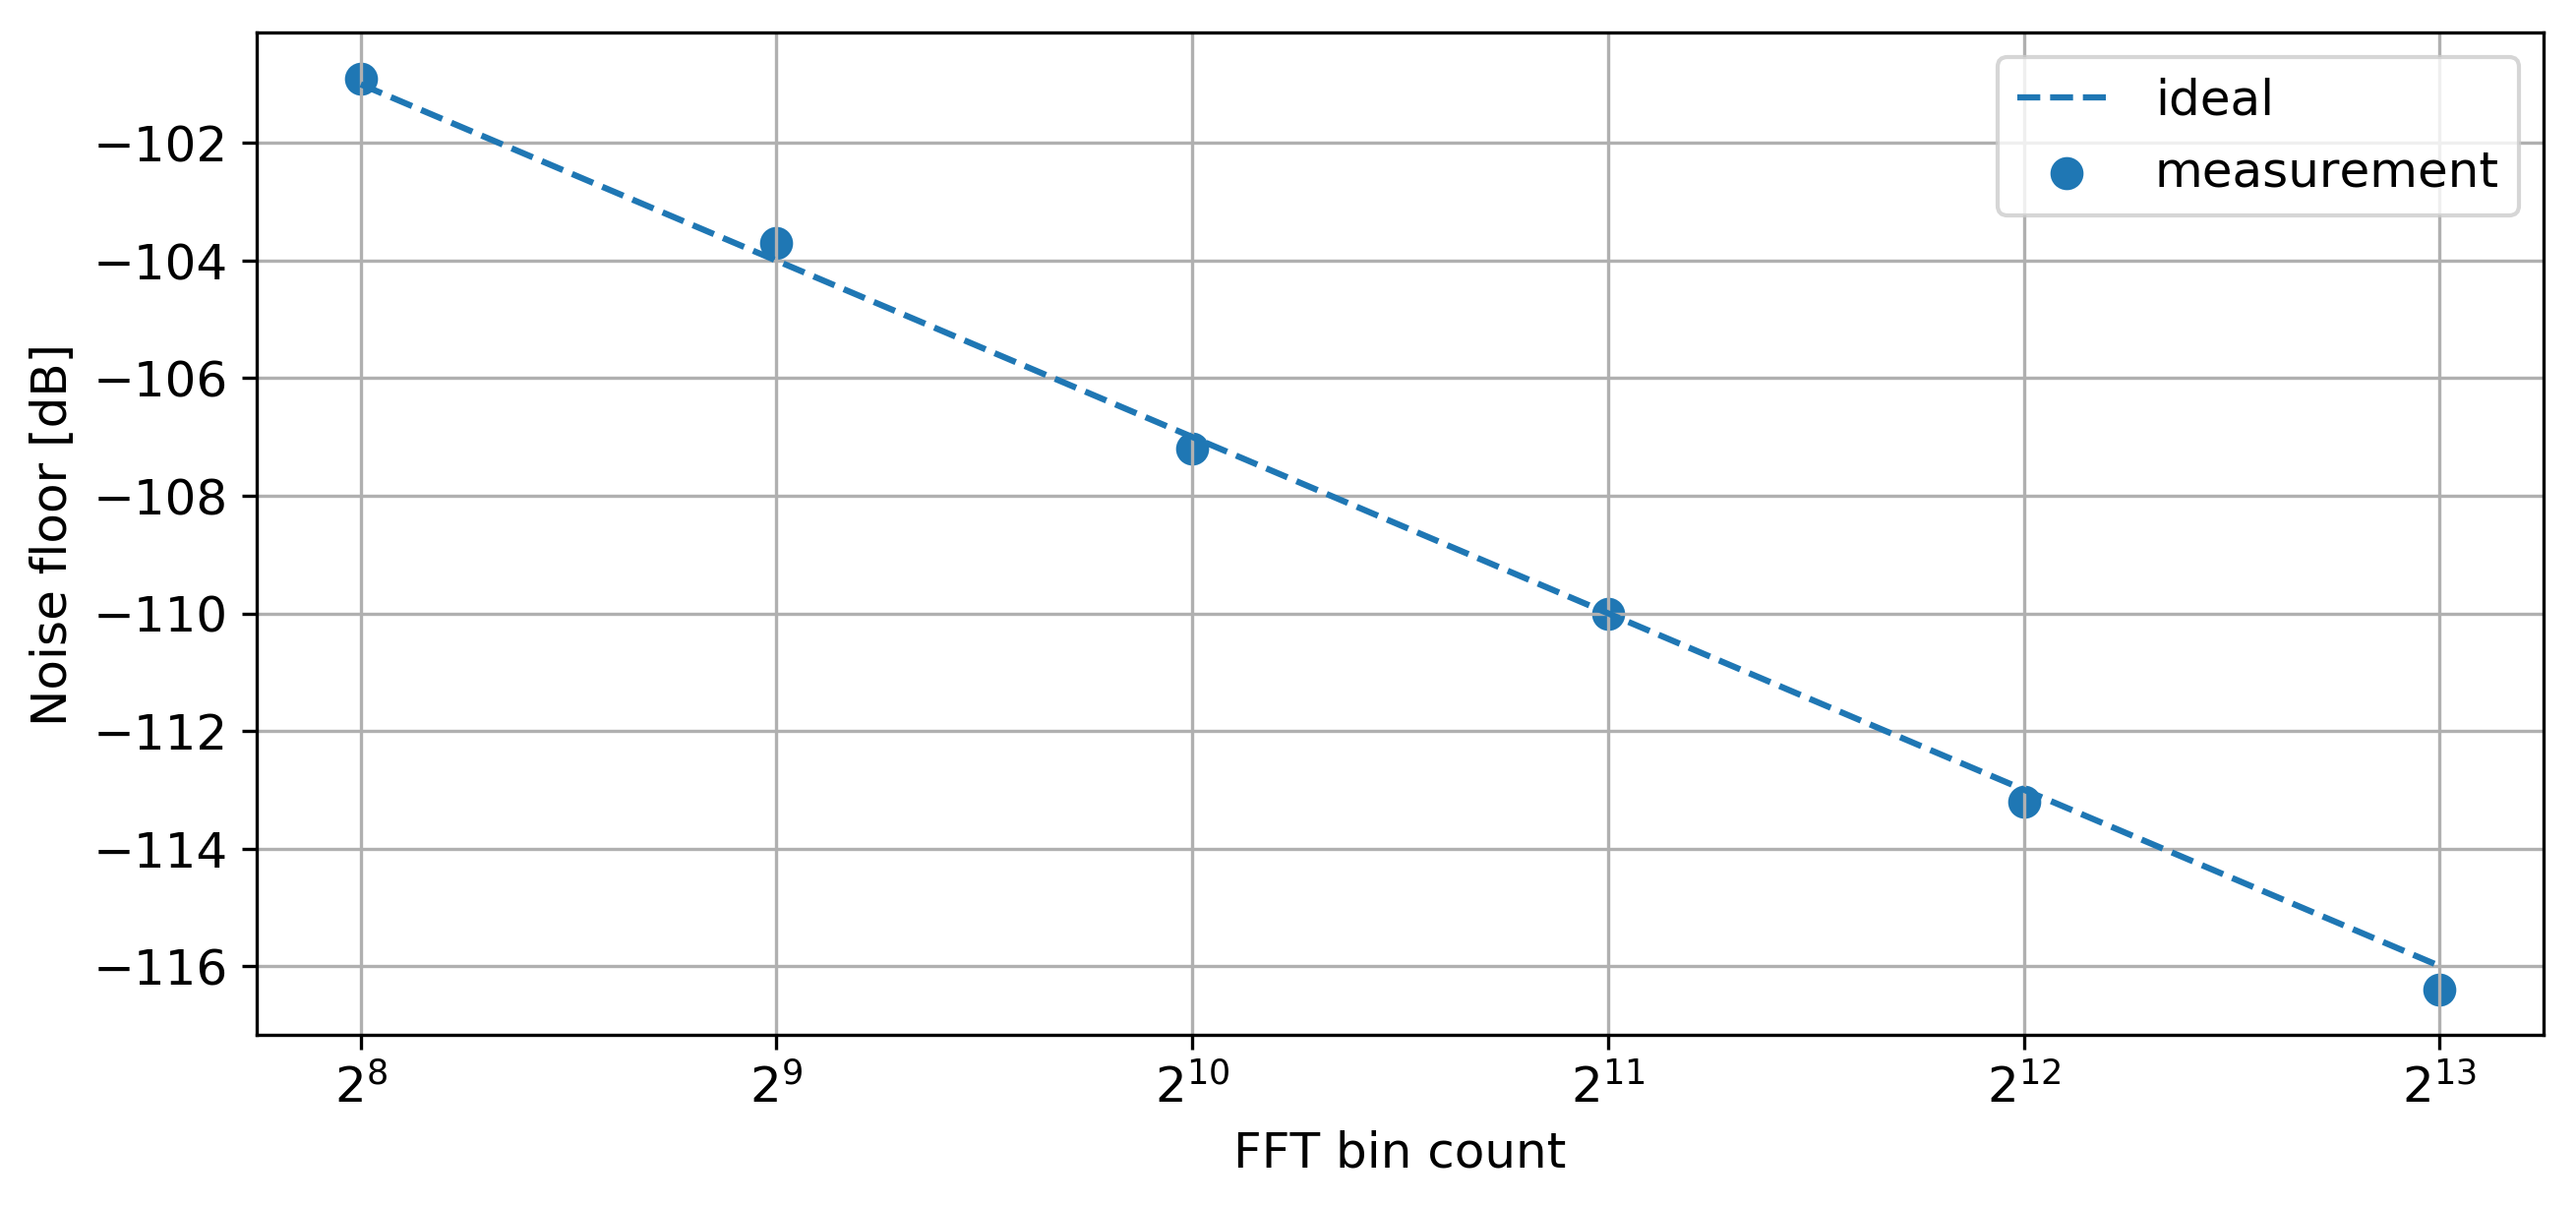

In [33]:
from matplotlib.ticker import FuncFormatter

matplotlib.rcParams.update({'font.size': 12})


# cols: FFT size [count], power [dBFS] 
data = np.array([
    [8192, -116.4],
    [4098, -113.2],
    [2048, -110.0],
    [1024, -107.2],
    [512, -103.7],
    [256, -100.9],
])

fig = plt.figure(figsize=(10,4.5), dpi=300)

plt.scatter(data[:,0], data[:,1], s=50, label='measurement')
plt.plot([2**8, 2**13], [-101, -116], '--', label='ideal')
plt.ylabel('Noise floor [dB]')
plt.xlabel('FFT bin count')
plt.legend()
plt.semilogx(basex=2)
plt.grid(which='both')
plt.savefig('doc/img/noise-vs-bins.png', bbox_inches='tight', dpi = 300)
plt.show()

In [190]:
2**13

8192

# GNU radio fft dB scale

In GNU radio power in decibels are reported as a the ratio to an arbitrary power that is represtend as amplitude. This is sometimes referred to as dBFS or dBov

ITU-T Rec. G.100.1

$L_{ov} = 10 \log_{10}\left(\cfrac{P}{1.0}\right)$

# Resolution

test signal 

815 MhZ -60 dBm AM modulated 30% modulation index 500 Hz LF frequency

Doubling the FFT bin count increases the frequency resolution by a factor of 2 (1/1 ratio)

## Measurement setup

- Rhode & schwarz SMC100A signal generator
- Mini circuits ZAPD 2-252-N+ power splitter
- NI USRP-2932 software radio
- Rhode & Schwarz FSH4 spectrum analyzer
- generated signal spitted between and SDR and analyzer

SDR dB scale shows corret relative values. The dB scale is in reference to an arbitrary level (1.0), not actual power as in eg. dBm

# IQ balance calibration

A calibration command should be included when installing GNUradio

run the command:

```
udg_cal_rx_iq_balance
```

**FALSE?**: It is important to terminate the antenna connector with a 50 Ohm load while the calibration program is running.

In [104]:
a = np.arange(20)
a
a = a + 1
a = a * 2
a = 100e6 / a 
a

list(a)

The lowest allowed 

100e6 / 0.195312e6

512.0013107233555

# Heat map visual


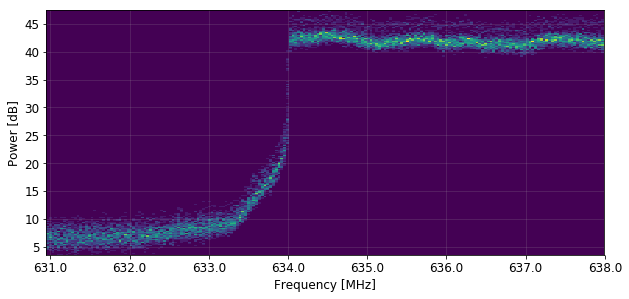

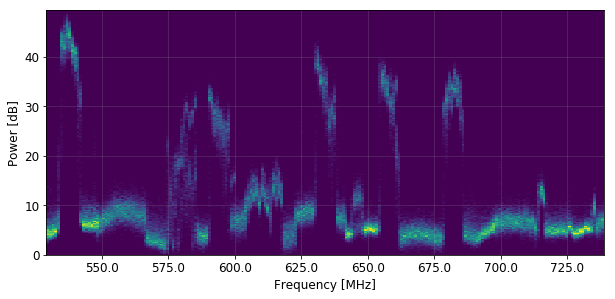

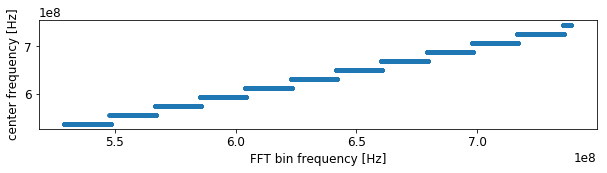

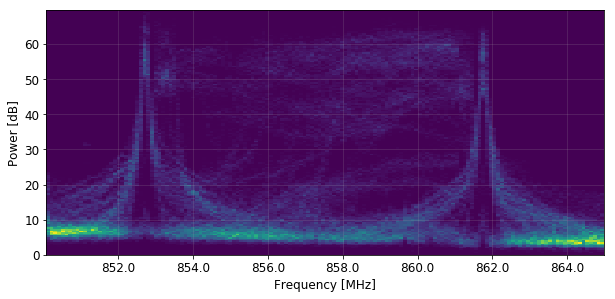

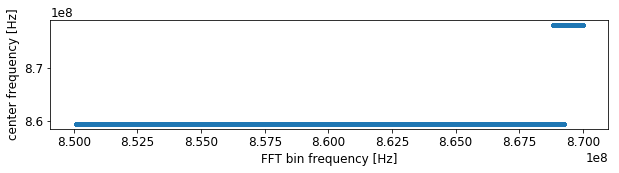

In [32]:

matplotlib.rcParams.update({'font.size': 12})

df = read_sense_v0_0('data/2017-02-01 14:30:10.193575-sense.tsv')

show_heatmap(df[df.bin_f < 6.38e8], bins=200)
plt.savefig('doc/img/histogram-DVB.png',bbox_inches='tight',dpi=300)

show_heatmap(read_sense_v0_1('data/2017-05-11 10:58:45.018242-sense.tsv'), bins=200)
plt.savefig('doc/img/histogram-long.png',bbox_inches='tight',dpi=300)
show_frequencies(read_sense_v0_1('data/2017-05-11 10:58:45.018242-sense.tsv'))


df = read_sense_v0_1('data/2017-05-11 12:17:47.256922-sense.tsv')
show_heatmap(df[df.bin_f <8.65e8], bins=150)

plt.savefig('doc/img/histogram-mobile.png',bbox_inches='tight', dpi=300)
show_frequencies(read_sense_v0_1('data/2017-05-11 12:17:47.256922-sense.tsv'))


plt.show()

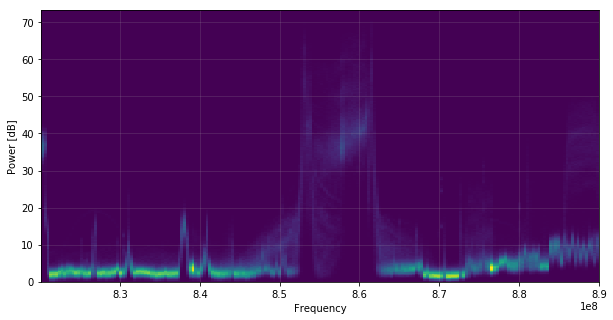

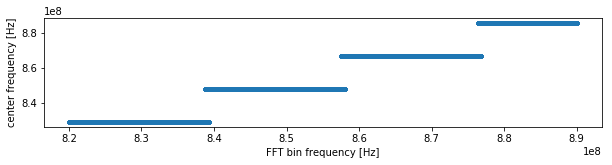

In [198]:
%matplotlib inline
df = read_sense_v0_1('data/2017-05-11 12:21:40.016226-sense.tsv')
show_heatmap(df, bins=200)
show_frequencies(df)
plt.show()

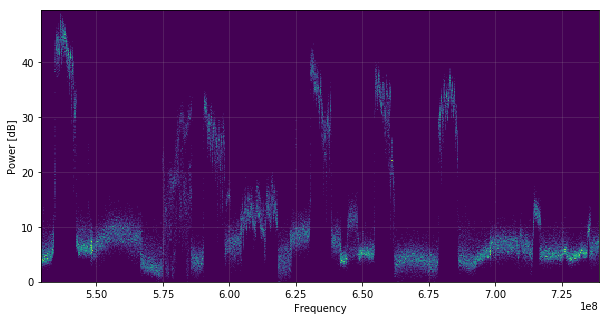

In [197]:
%matplotlib inline
df = read_sense_v0_1('data/2017-05-11 10:58:45.018242-sense.tsv')
show_heatmap(df, bins=500)
# show_frequencies(df)
plt.show()




# Time average of mobile band spectum figure

In [ ]:
# measurement collected from some mobile communications band
df = read_sense_v0_1('data/2017-05-11 12:17:47.256922-sense.tsv')
df = df[df.bin_f <8.65e8]
powers = []
freqs = df.bin_f.unique()
for freq in freqs:
    powers.append(df[df.bin_f == freq].power.mean())

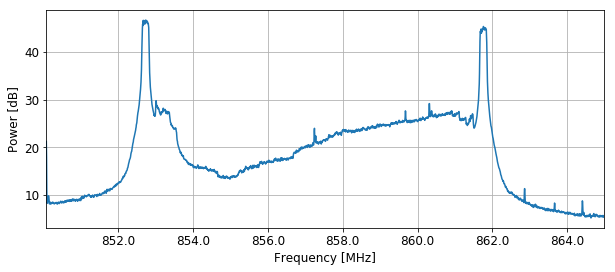

In [163]:

matplotlib.rcParams.update({'font.size': 12})

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: x/1e6))

plt.ylabel("Power [dB]")
plt.xlabel("Frequency [MHz]")
plt.grid()
plt.xlim(freqs.min(), freqs.max())
plt.plot(freqs, powers)
plt.savefig('doc/img/mobile-average-spectrum.png', dpi = 300, bbox_inches = 'tight')
plt.show()


# FFT bin size effect on scanned frequencies in scan tool


These measurements vere done using sensetool-v0.1.

Explicitly giving the fft-size (aka how many bins) and the sample rate should cause the bin width to be calculated

In [137]:
!ls data/2017-05-11*

data/2017-05-11 10:43:50.845238-sense.tsv
data/2017-05-11 10:58:45.018242-sense.tsv
data/2017-05-11 11:04:49.422022-sense.tsv


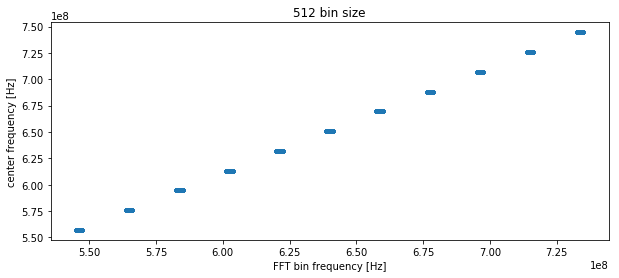

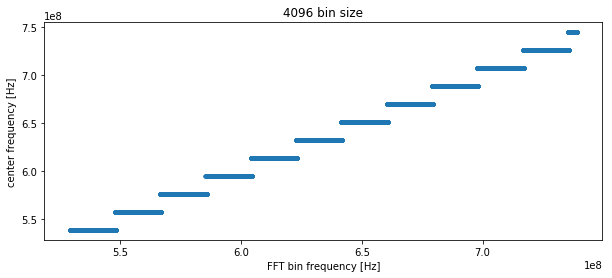

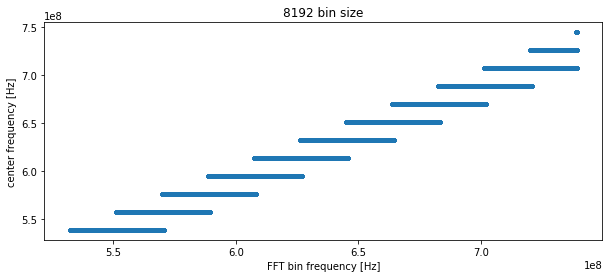

In [160]:

# these were all done with the same settings except --fft-size
show_frequencies('data/2017-05-11 10:43:50.845238-sense.tsv')
plt.title("512 bin size")
show_frequencies('data/2017-05-11 10:58:45.018242-sense.tsv')
plt.title("4096 bin size")
show_frequencies('data/2017-05-11 11:04:49.422022-sense.tsv')
plt.title("8192 bin size")
plt.show()

# Scan hopping graph (for publishing)

In [26]:
df = read_sense_v0_1('data/2017-05-11 10:58:45.018242-sense.tsv')
df = df[df.sweep == 0]

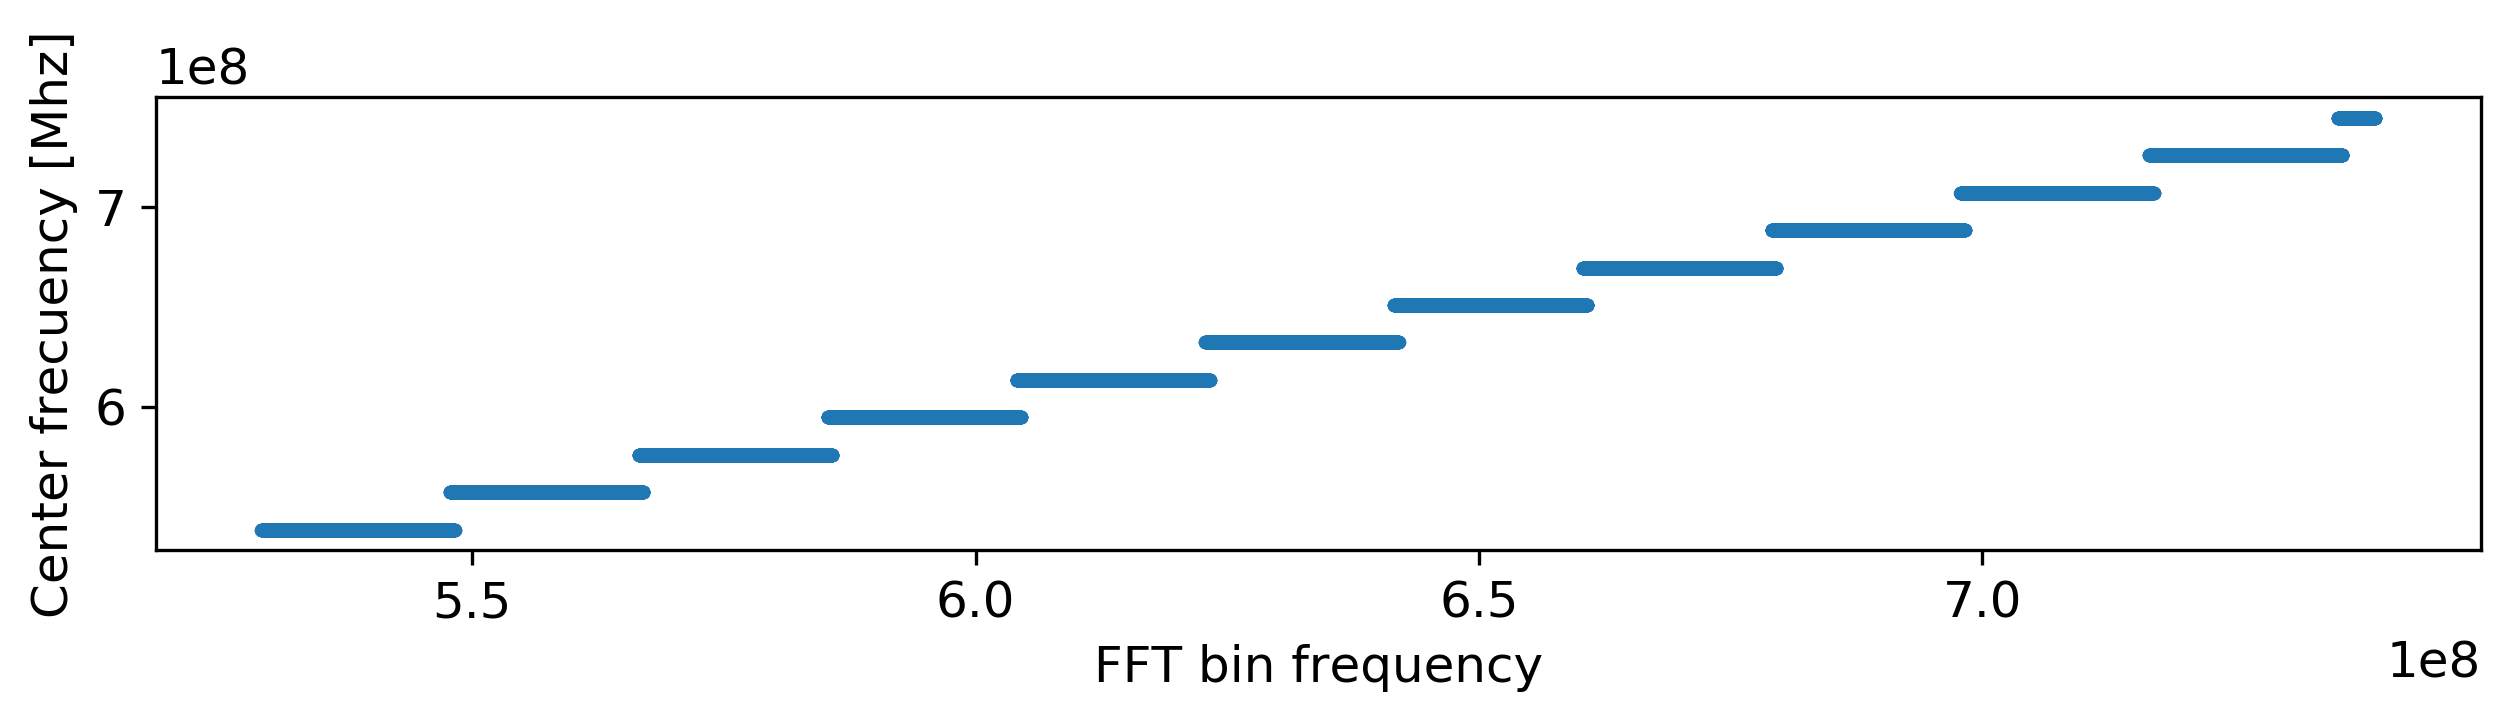

In [28]:
plt.figure(figsize=(10,2), dpi=300)
plt.scatter( df.bin_f, df.center_f,s=5)
plt.ylabel('Center frecuency [Mhz]')
plt.xlabel('FFT bin frequency')
plt.savefig('doc/img/centerf-vs-binf.png', bbox_inches='tight', dpi=300)
plt.show()

# Data set size over time

In [244]:
df = read_sense_v0_1('data/2017-05-11 12:57:10.944323-sense.tsv')

In [207]:
print(df.time.min())
print(df.time.max())

2017-05-11 12:57:11.446130
2017-05-11 13:13:55.372397


In [209]:
# this many bytes/per this many minutes
569606798/17.73

32126722.955442753

# CSV vs. pickle size

In [52]:
df = read_sense_v0_1('data/2017-05-11 14:33:26.746052-sense.tsv')
df.to_pickle('/tmp/2017-05-11 10:58:45.018242-sense.pkl')
#df.to_pickle('/tmp/2017-05-11 10:58:45.018242-sense.pkl.gzip')
df.to_hdf('/tmp/2017-05-11 10:58:45.018242-sense.hdf', 'data_2017_05_11T10_58_45_018242_sense')
df.to_csv('/tmp/a.csv.gz', compression='bz2')
import os
print(os.path.getsize('data/2017-05-11 14:33:26.746052-sense.tsv'))
print(os.path.getsize("/tmp/2017-05-11 10:58:45.018242-sense.pkl"))
#print(os.path.getsize("/tmp/2017-05-11 10:58:45.018242-sense.pkl.gzip"))
print(os.path.getsize('/tmp/2017-05-11 10:58:45.018242-sense.hdf'))
print(os.path.getsize('/tmp/a.csv.gz'))

56665282
45455436
156565120
11407714


# Full available spectrum scan



In [261]:
## this dataset was scanned from 400 MHz to almost 4 GHz
df = read_sense_v0_1('data/2017-05-11 14:33:26.746052-sense.tsv')
df = df[:-1] # just in case the last row is corrumpted

In [263]:
%matplotlib qt
show_frequencies(df)
plt.show()

In [238]:
%matplotlib qt
plt.hist2d(df.bin_f, df.power, bins= (5000,100))
plt.show()

In [262]:
plt.plot(df.bin_f, df.power)
plt.show()

In [255]:
plt.scatter(df.bin_f, df.power, marker='+')
plt.show()

In [ ]:
plt.grid()
plt.show()

In [266]:
plt.legend("hello")
plt.title("asdf")

# better stiched sensing spectum

4


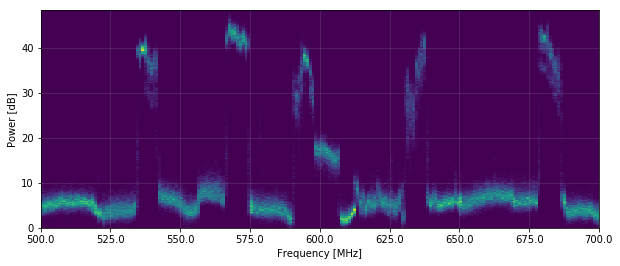

In [3]:
%matplotlib inline
df = read_sense_v0_1('data/2017-05-29 09:50:50.723696-sense.tsv')
df = df[df.bin_f < 700e6]
df = df[df.sweep < 5]
#plot_specturm(df)
#df = df[df.sweep != df.sweep.max()]
print(df.sweep.max())
show_heatmap(df, bins=200)
plt.savefig('doc/img/stiched-spectum-0-2-base.png', dpi=300, bbox_inches = 'tight')
plt.show()

# DC offset data quality impact

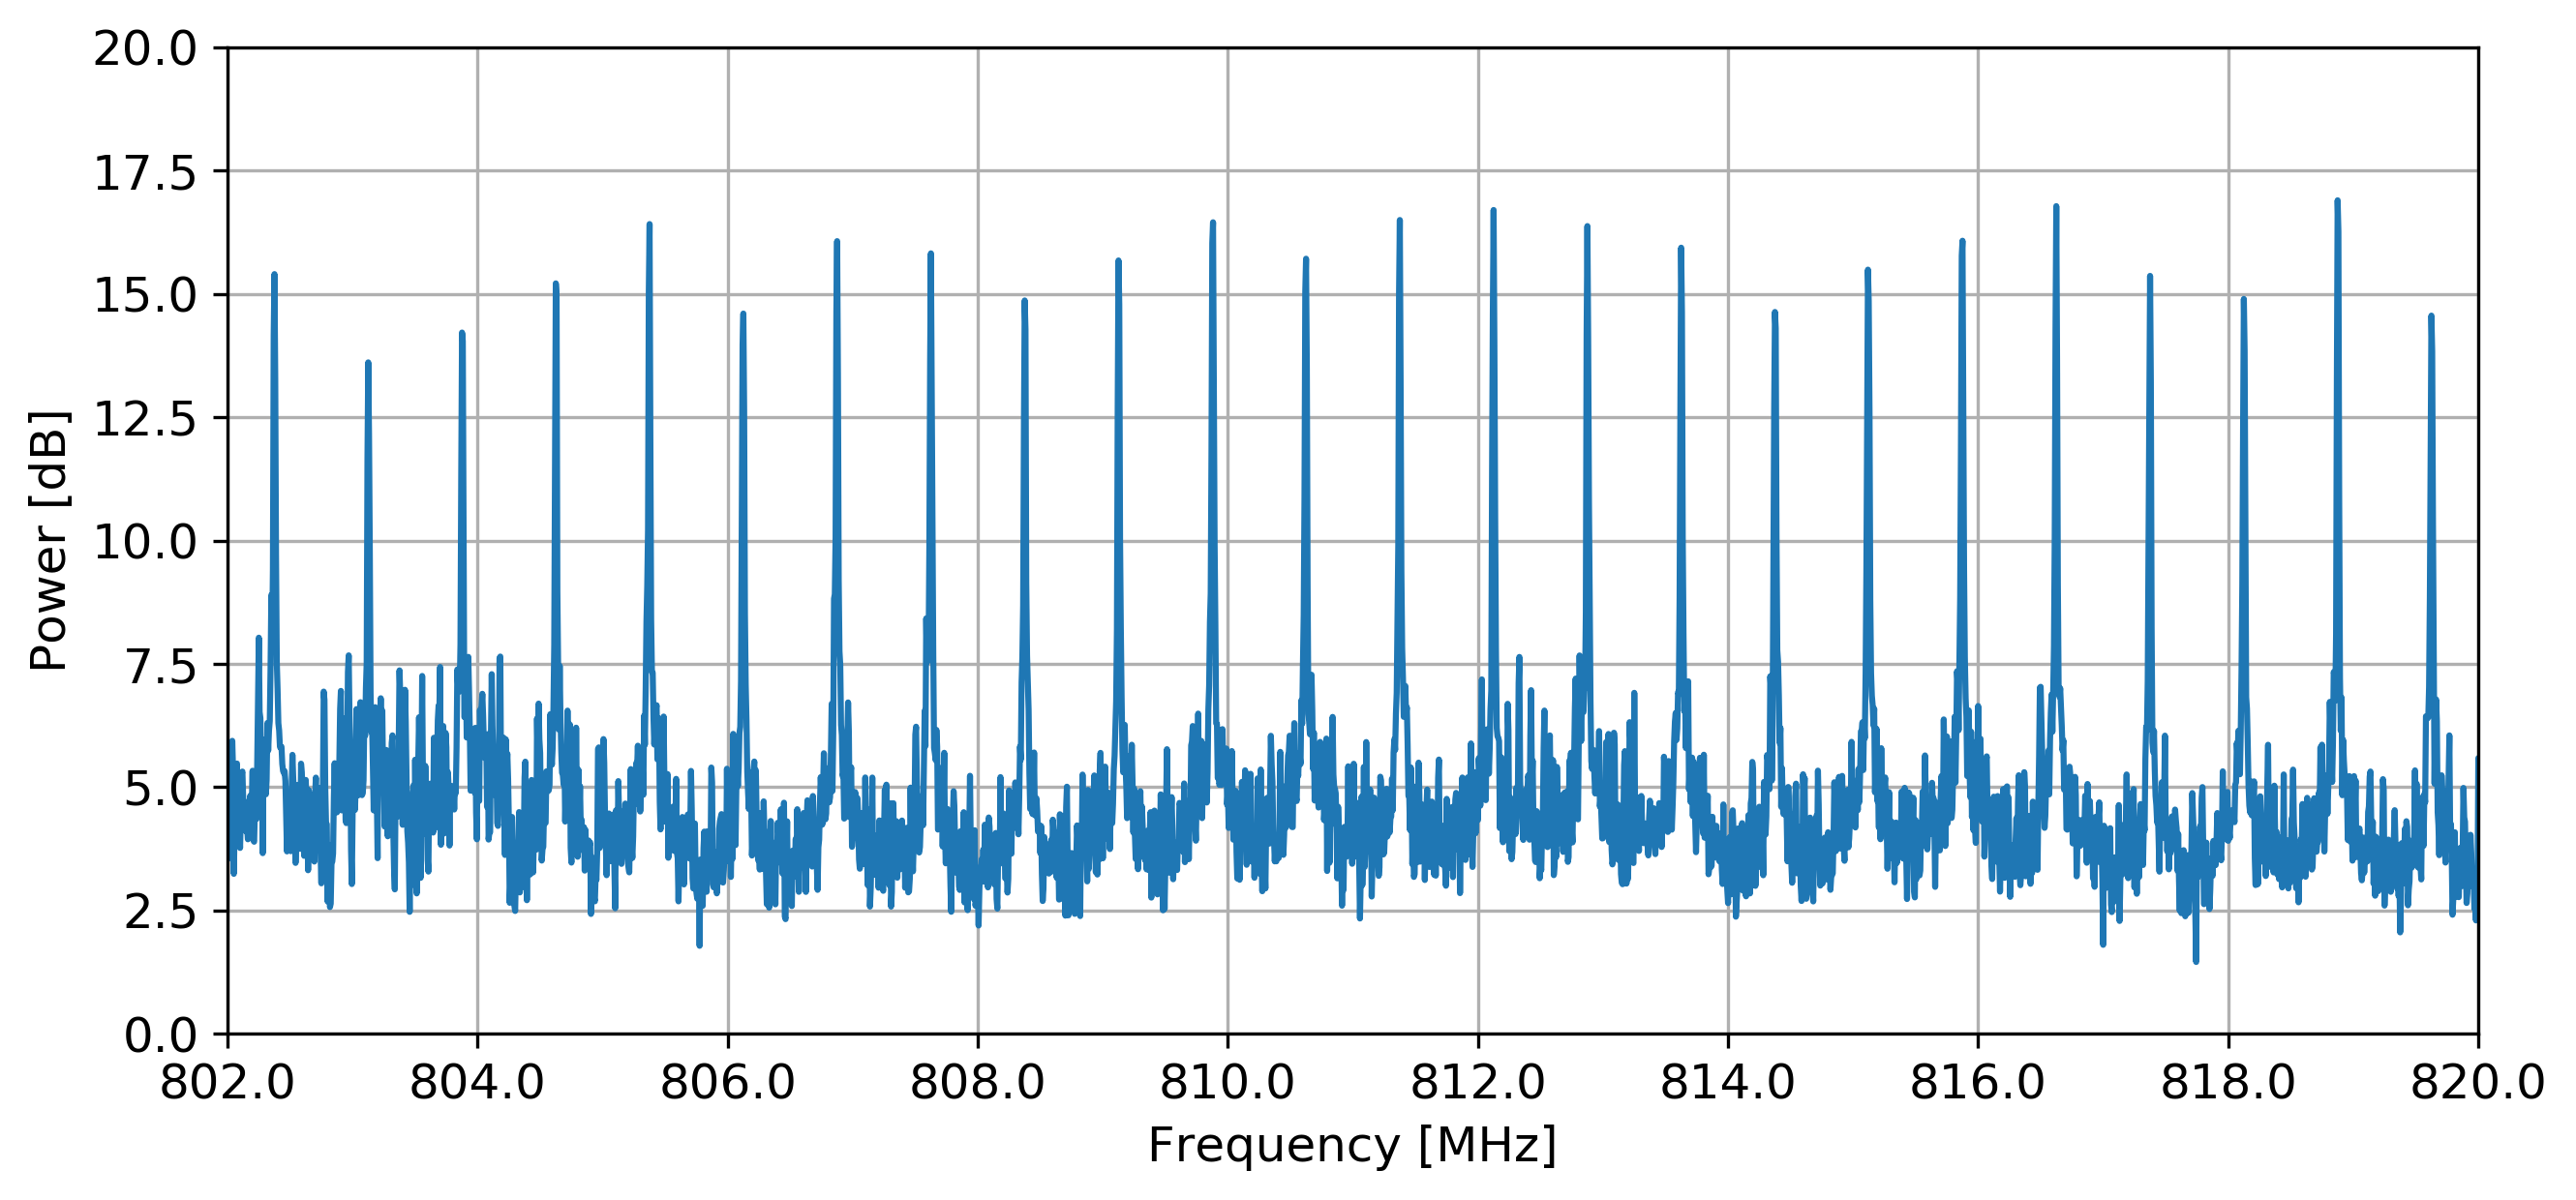

In [34]:

df = pd.read_csv('data/2017-01-25 15:06:07.339379-sense.tsv', header=None, delimiter="|", names=["time", "center_f", "bin_f", "power", "noise", 'scan', 'sweep'])

df = df[df.sweep == 0]

fig = plt.figure(figsize=(10,4.5), dpi=300)
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: x/1e6))

plt.grid()
plt.xlim(802e6, 820e6)
plt.ylim(0,20)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [dB]')
plt.plot(df.bin_f, df.power)
plt.savefig('doc/img/dc-offset-impact.png', dpi=300, bbox_inches= 'tight')
plt.show()

# IQ balance constellations

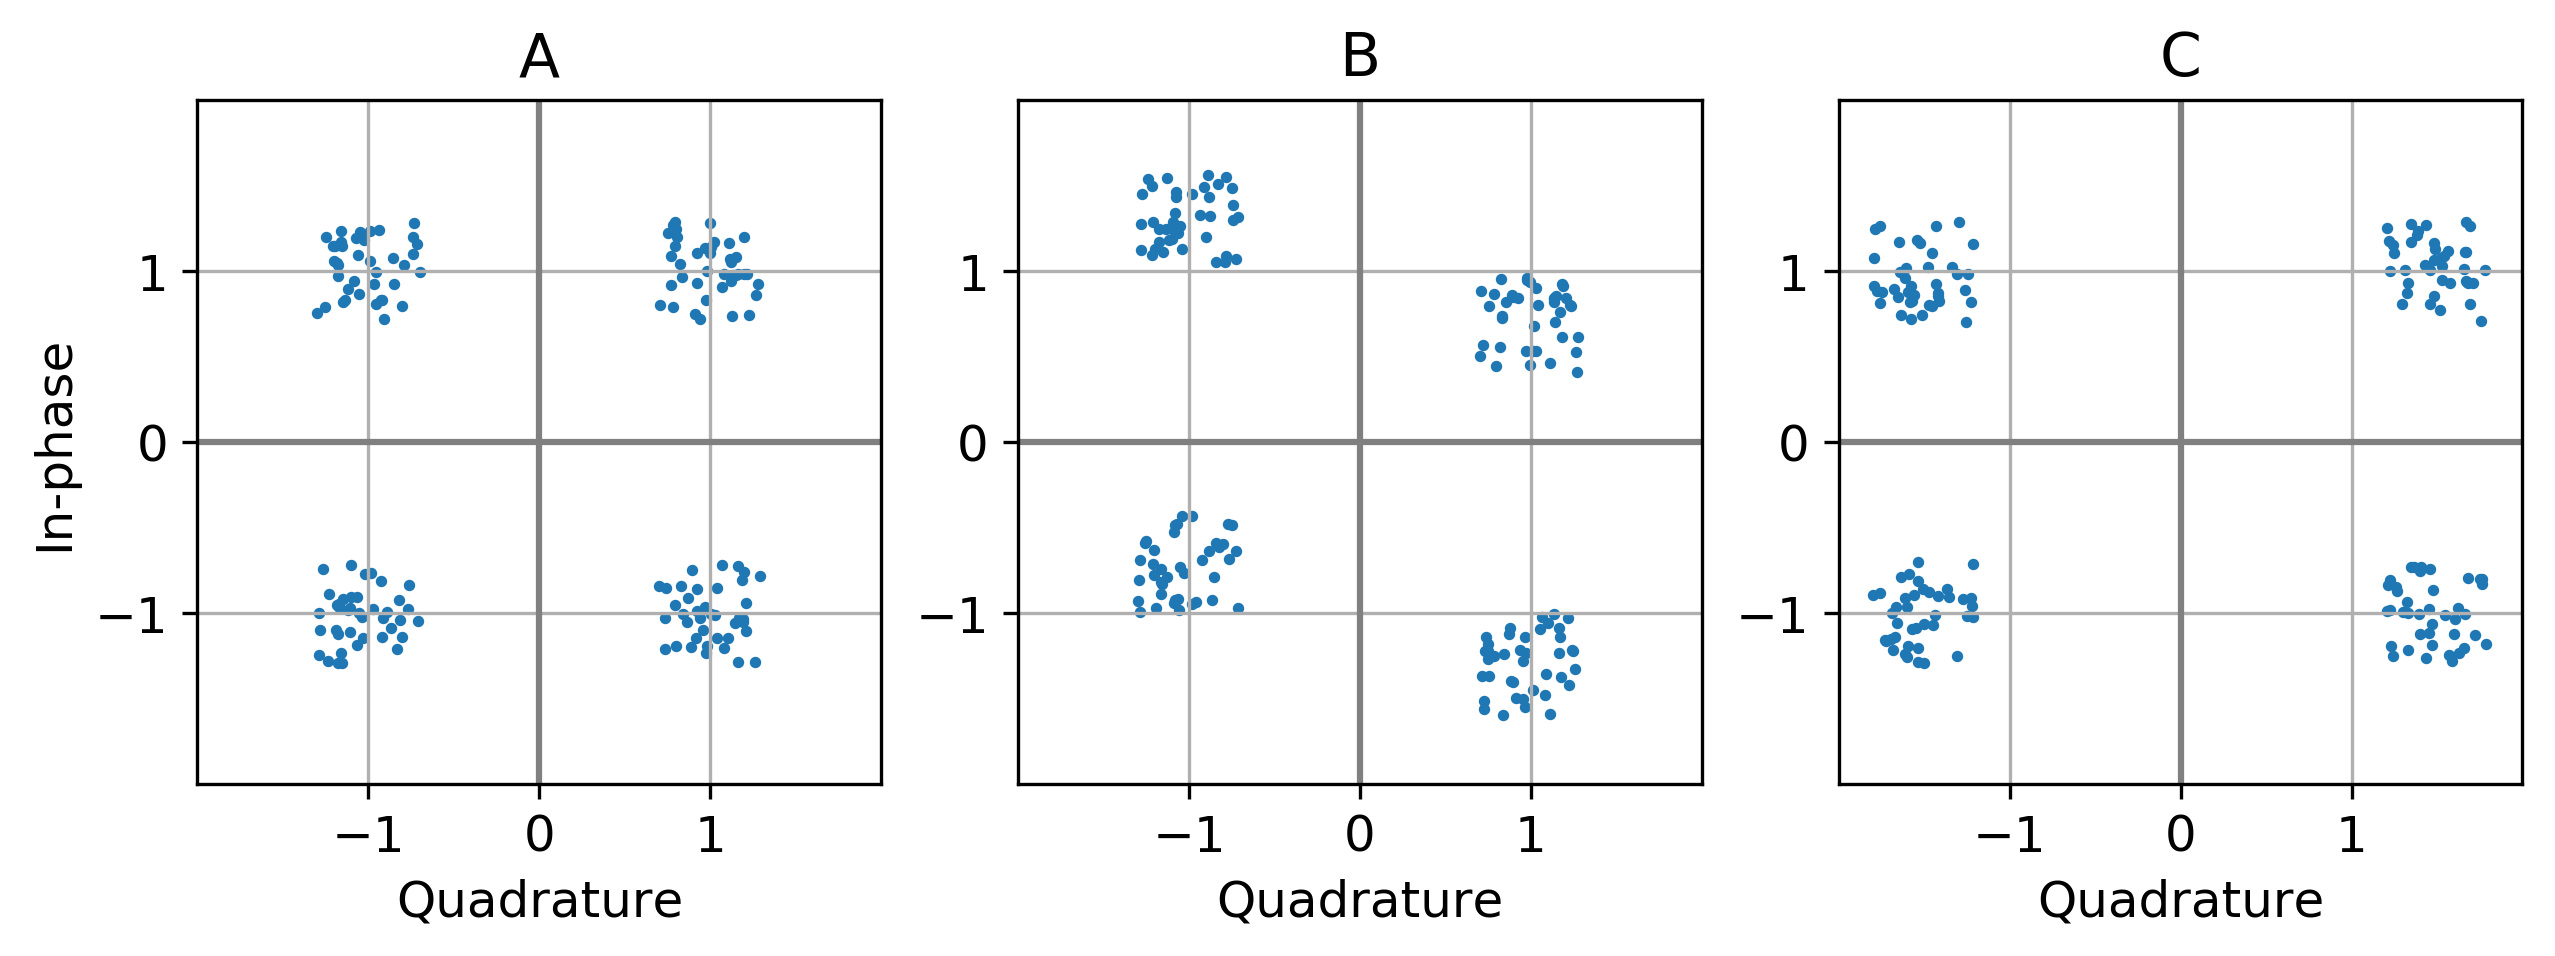

In [136]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams.update({'font.size': 12})


noise = 0.6
ampl = 1
points = 30

def rnoise():
    num = 40
    return np.random.random(num)
    
I = rnoise() * noise + ampl - noise*0.5
I = np.append(I,rnoise() * noise + ampl - noise*0.5)
I = np.append(I,rnoise() * noise - ampl - noise*0.5)
I = np.append(I,rnoise() * noise - ampl - noise*0.5)

Q = rnoise() * noise + ampl - noise*0.5
Q = np.append(Q,rnoise() * noise - ampl - noise*0.5)
Q = np.append(Q,rnoise() * noise + ampl - noise*0.5)
Q = np.append(Q,rnoise() * noise - ampl - noise*0.5)


dc = 0.5
I_dc = rnoise() * noise + ampl + dc - noise*0.5
I_dc = np.append(I_dc,rnoise() * noise + ampl + dc - noise*0.5)
I_dc = np.append(I_dc,rnoise() * noise - ampl - dc - noise*0.5)
I_dc = np.append(I_dc,rnoise() * noise - ampl - dc - noise*0.5)

Q_dc = rnoise() * noise + ampl - noise*0.5
Q_dc = np.append(Q_dc,rnoise() * noise - ampl - noise*0.5)
Q_dc = np.append(Q_dc,rnoise() * noise + ampl - noise*0.5)
Q_dc = np.append(Q_dc,rnoise() * noise - ampl - noise*0.5)

phase= 0.3
I_phase = rnoise() * noise + ampl - noise*0.5
I_phase = np.append(I_phase,rnoise() * noise + ampl - noise*0.5)
I_phase = np.append(I_phase,rnoise() * noise - ampl - noise*0.5)
I_phase = np.append(I_phase,rnoise() * noise - ampl - noise*0.5)

Q_phase = rnoise() * noise + ampl  - phase- noise*0.5
Q_phase = np.append(Q_phase,rnoise() * noise - ampl - phase - noise*0.5)
Q_phase = np.append(Q_phase,rnoise() * noise + ampl+ phase - noise*0.5)
Q_phase = np.append(Q_phase,rnoise() * noise - ampl+ phase - noise*0.5)

marker_size= 3

def prep_IQ():

    plt.xlabel('Quadrature')
    plt.ylim(-2,2)
    plt.xticks([-1,0,1])
    plt.yticks([-1,0,1])
    plt.grid()
    plt.axhline(0, color = 'grey')
    plt.axvline(0, color = 'grey')
    plt.xlim(-2,2)

fig = plt.figure(figsize=(10,4.5), dpi=300)
ax = fig.add_subplot(1,3,1,aspect='equal')
ax.set_title('A')
ax.set_ylabel('In-phase')
plt.scatter(I, Q, s= marker_size)
prep_IQ()

ax = fig.add_subplot(1,3,2,aspect='equal')
ax.set_title('B')
plt.scatter(I_phase, Q_phase,s= marker_size)
prep_IQ()


ax = fig.add_subplot(1,3,3,aspect='equal')
ax.set_title('C')
plt.scatter(I_dc, Q_dc, s= marker_size)
prep_IQ()

plt.savefig('doc/img/iq-balance.png', bbox_inches='tight', dpi=300)
plt.show()

In [109]:
len("""Tämä opinnäytetyö käsittelee radiospektin monitorointiin liittyvää teoriaa ja kuvailee Na-
tional Instruments Universal Software Radio Peripheral -ohjelmistoradiolla (USRP) toteutetun
spektrinmonitorointijärjestelmän keskeisiä osia ja toimintoja.
Työn tarkoituksena oli luoda syvempi ymmärrys tarvittavien komponenttien toiminnasta ja
niiden aiheuttamista onglemista käyttäen järjestelmän toteutusprosessia tukena ongelmien
löytämistä varten. Toteutuksen aikana havaittiin toimintaan vaikuttavia ilmiöitä, joita tutkit-
tiin jotta niiden negatiivinen vaikutus voitiin minmoida. Monitorointijärjestelmän logiikka
toteutettiin käyttämällä GNURadio -koodikirjastoa signaalinkäsittelyä varten sekä USRP:m
ohjaamista varten. Python -skripikieltä käytettiin korkeamman tason logiikan sekä mittaus-
tulosten graafisen esityksen toteuttamisessa. Järjestelmällä kerättyä mittaustietoa verrattiin
perinteisen spektrianalysaattorin mittatietoihin, ja todettiin tietojen täsmäävän toistensa kanssa.
Työssä verrataan mittaustulosten esittelyä histogrammina tavanomaisen tehospektin sijaan,
jossa informaatio tehon jakaumasta menetetään.
Työssä selvitettiin miten ohjlemistoradioiden etuosan epäideaalisuudet aiheuttavat spektrissä
näkyviä tasajännitepiikkejä ja kuinka sopimattoman näytetaajuuden valitseminen voi aiheuttaa
suuria vääristymiä mitatun spektrin amplitudissa vastaanottimen jälleennäytteistämisvaiheen
jälkeen. Kun käytetään ohjelmistoradiota spektrin mittauksessa voidaan tehdä kompromisseja
tarvittavan levytilan, laskentakyvyn, taajuusresoluution ja aikaresoluution välillä, riippuen siitä
millaisia imliöitä halutaan mitata. Lopuksi pohditaan miten etuosan toimintaan voidaan
vaikuttaa laitteen suojelemiseksi suurtehosilta signaaleilta, ja miten etuosan aiheuttamia IQ-
näytteistämisen epätasapainoisuuksia korjataan empiirisen kalibroinnin avulla.""")

1854

In [107]:
%magic